In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("student_risk.csv")
df.head()


,attendance,assignment_score,internal_marks,study_hours,sleep_hours,backlogs,internet_hours,result
0,78,70,72,3,7,0,2,1
1,45,40,38,1,5,2,6,0
2,82,75,78,4,8,0,2,1
3,60,55,58,2,6,1,4,0
4,90,88,92,5,8,0,1,1


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   attendance        90 non-null     int64
 1   assignment_score  90 non-null     int64
 2   internal_marks    90 non-null     int64
 3   study_hours       90 non-null     int64
 4   sleep_hours       90 non-null     int64
 5   backlogs          90 non-null     int64
 6   internet_hours    90 non-null     int64
 7   result            90 non-null     int64
dtypes: int64(8)
memory usage: 5.8 KB


,attendance,assignment_score,internal_marks,study_hours,sleep_hours,backlogs,internet_hours,result
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000
mean,68.788889,64.500000,64.255556,2.877778,6.500000,0.90000,3.422222,0.500000
std,17.727332,18.880017,20.946460,1.436505,1.030436,1.04988,1.804973,0.502801
min,40.000000,35.000000,30.000000,1.000000,5.000000,0.00000,1.000000,0.000000
25%,53.000000,48.000000,46.250000,2.000000,6.000000,0.00000,2.000000,0.000000
50%,69.000000,64.000000,64.000000,2.500000,6.500000,0.50000,3.500000,0.500000
75%,86.000000,83.000000,85.000000,4.000000,7.000000,2.00000,5.000000,1.000000
max,92.000000,91.000000,95.000000,5.000000,8.000000,3.00000,6.000000,1.000000


In [4]:
df.isnull().sum()


attendance          0
assignment_score    0
internal_marks      0
study_hours         0
sleep_hours         0
backlogs            0
internet_hours      0
result              0
dtype: int64

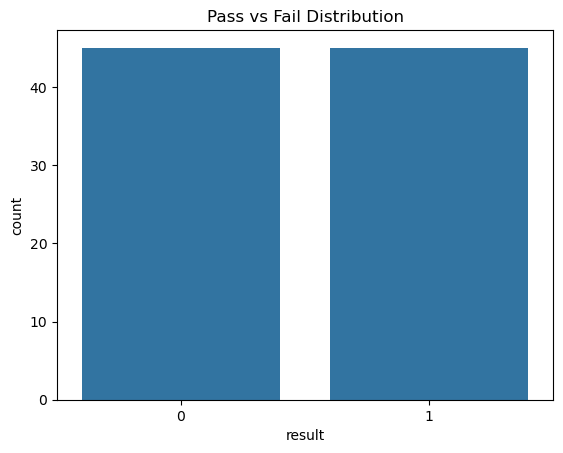

In [5]:
sns.countplot(x="result", data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


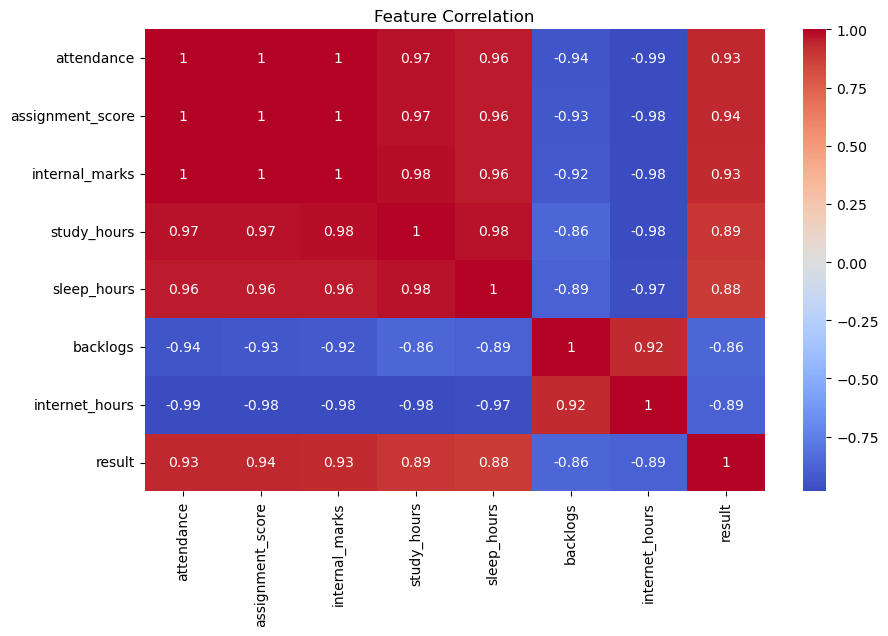

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [7]:
X = df.drop("result", axis=1)
y = df["result"]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
[[ 5  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[ 5  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [11]:
importance = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_df


,Feature,Importance
1,assignment_score,0.18
0,attendance,0.17
5,backlogs,0.17
2,internal_marks,0.15
6,internet_hours,0.15
4,sleep_hours,0.09
3,study_hours,0.09


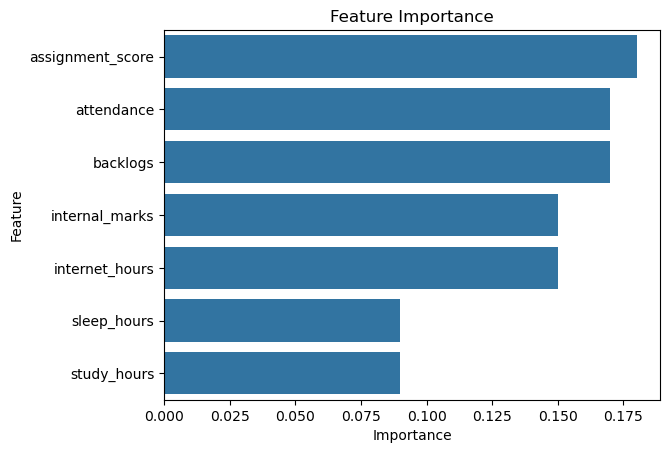

In [12]:
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Feature Importance")
plt.show()


In [13]:
def risk_label(row):
    if row["attendance"] < 60 or row["study_hours"] < 2:
        return "High Risk"
    elif row["attendance"] < 75:
        return "Medium Risk"
    else:
        return "Low Risk"

df["risk_level"] = df.apply(risk_label, axis=1)
df[["attendance", "study_hours", "risk_level"]].head()


,attendance,study_hours,risk_level
0,78,3,Low Risk
1,45,1,High Risk
2,82,4,Low Risk
3,60,2,Medium Risk
4,90,5,Low Risk


In [14]:
df.groupby("risk_level").mean()


,attendance,assignment_score,internal_marks,study_hours,sleep_hours,backlogs,internet_hours,result
risk_level,,,,,,,,
High Risk,49.441176,43.882353,41.735294,1.470588,5.470588,2.058824,5.352941,0.0
Low Risk,85.222222,82.066667,83.600000,4.155556,7.400000,0.000000,1.822222,1.0
Medium Risk,61.363636,56.363636,54.727273,2.000000,6.000000,1.000000,4.000000,0.0
